In [1]:
import matplotlib.pyplot as plt 
import cmasher as cmr
from synthesizer.abundances import (
    depletion_models,
    elements,
)

print(depletion_models.available_patterns)

elements = elements.Elements()

ModuleNotFoundError: No module named 'dense_basis'

In [ ]:
# set style
plt.style.use('../../../matplotlibrc.txt')

In [ ]:


default_model = 'Jenkins+2009\ F_{\star}=0.5'

depletion_patterns = {
    'CloudyClassic': depletion_models.CloudyClassic(),
    'Gutkin2016': depletion_models.Gutkin2016(),
    'Jenkins+2009\ F_{\star}=0.0': depletion_models.Jenkins2009_Gunasekera2021(fstar=0.0),
    'Jenkins+2009\ F_{\star}=0.25': depletion_models.Jenkins2009_Gunasekera2021(fstar=0.25),
    'Jenkins+2009\ F_{\star}=0.5': depletion_models.Jenkins2009_Gunasekera2021(fstar=0.5),
    'Jenkins+2009\ F_{\star}=0.75': depletion_models.Jenkins2009_Gunasekera2021(fstar=0.75),
    'Jenkins+2009\ F_{\star}=1.00': depletion_models.Jenkins2009_Gunasekera2021(fstar=1.0),
}


default_size = 60
Jenkins2009_size = 20

size = {
    'CloudyClassic': default_size,
    'Gutkin2016': default_size,
    'Jenkins+2009\ F_{\star}=0.0': Jenkins2009_size,
    'Jenkins+2009\ F_{\star}=0.25': Jenkins2009_size,
    'Jenkins+2009\ F_{\star}=0.5': Jenkins2009_size,
    'Jenkins+2009\ F_{\star}=0.75': Jenkins2009_size,
    'Jenkins+2009\ F_{\star}=1.00': Jenkins2009_size,
}

Jenkins2009_marker = 'o'

markers = {
    'CloudyClassic':'s',
    'Gutkin2016': '^',
    'Jenkins+2009\ F_{\star}=0.0': Jenkins2009_marker,
    'Jenkins+2009\ F_{\star}=0.25': Jenkins2009_marker,
    'Jenkins+2009\ F_{\star}=0.5': Jenkins2009_marker,
    'Jenkins+2009\ F_{\star}=0.75': Jenkins2009_marker,
    'Jenkins+2009\ F_{\star}=1.00': Jenkins2009_marker,
}

cmap = cmr.guppy


facecolours = {
    'CloudyClassic':'0.9',
    'Gutkin2016': '0.9',
    'Jenkins+2009\ F_{\star}=0.0': cmap(0.0),
    'Jenkins+2009\ F_{\star}=0.25': cmap(0.25),
    'Jenkins+2009\ F_{\star}=0.5': cmap(0.5),
    'Jenkins+2009\ F_{\star}=0.75': cmap(0.75),
    'Jenkins+2009\ F_{\star}=1.00': cmap(1.0),
}

edgecolours = {
    'CloudyClassic':'k',
    'Gutkin2016': 'k',
    'Jenkins+2009\ F_{\star}=0.0': cmap(0.0),
    'Jenkins+2009\ F_{\star}=0.25': cmap(0.25),
    'Jenkins+2009\ F_{\star}=0.5': cmap(0.5),
    'Jenkins+2009\ F_{\star}=0.75': cmap(0.75),
    'Jenkins+2009\ F_{\star}=1.00': cmap(1.0),
}


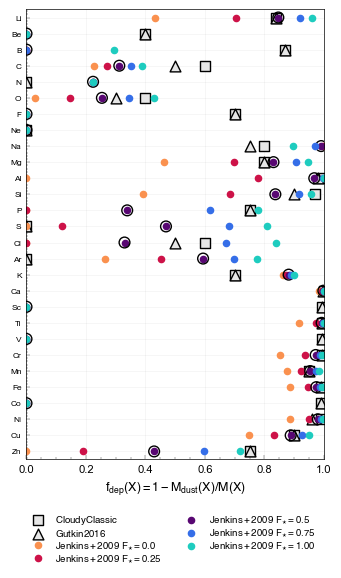

In [ ]:


fig = plt.figure(figsize=(3.5, 6.0))

left = 0.1
height = 0.75
bottom = 0.2
width = 0.85

ax = fig.add_axes((left, bottom, width, height))


element_indices = range(len(elements.metals))

for depletion_pattern_label, depletion_pattern in depletion_patterns.items():

    depletions = []
    
    for i, element in enumerate(elements.metals):

        if element in depletion_pattern.depletion.keys():
            depletions.append(1-depletion_pattern.depletion[element])
        else:
            depletions.append(0.0)


    ax.scatter(depletions, 
               element_indices, 
               s=size[depletion_pattern_label], 
               zorder=2, 
               marker=markers[depletion_pattern_label], 
               facecolors=facecolours[depletion_pattern_label], 
               edgecolors=edgecolours[depletion_pattern_label],
               label=fr'$\rm {depletion_pattern_label}$')
    
    if depletion_pattern_label == default_model:
        ax.scatter(depletions, 
                   element_indices, 
                   s=default_size, 
                   zorder=2, 
                   marker=markers[depletion_pattern_label], 
                   facecolors='none', 
                   edgecolors='k',)



ax.set_xlim([0.0, 1.0])

ax.set_ylim([len(elements.metals)-0.5, -0.5])

ax.legend(bbox_to_anchor=(1.0, -0.1), fontsize=7, labelspacing=0.1, ncol=2)


ax.set_yticks(
    range(len(elements.metals)), elements.metals, fontsize=6.0
)



ax.set_xlabel(r"$\rm f_{dep}(X)=1-M_{dust}(X)/M(X)$")

fig.savefig('figs/depletion_patterns.pdf')





